In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

C:\Users\HP\AppData\Local\Temp\ipykernel_16472\1790973436.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_excel(r'C:\Heart disease project\Heart-Disease-Prediction\Ch3.ClevelandData.xlsx')

In [3]:
df.shape

(303, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hal,HeartDisease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [5]:
df.isnull().sum()

age             0
sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              0
hal             0
HeartDisease    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   sex           303 non-null    int64  
 2   cp            303 non-null    int64  
 3   trestbps      303 non-null    int64  
 4   chol          303 non-null    int64  
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalach       303 non-null    int64  
 8   exang         303 non-null    int64  
 9   oldpeak       303 non-null    float64
 10  slope         303 non-null    int64  
 11  ca            303 non-null    object 
 12  hal           303 non-null    object 
 13  HeartDisease  303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [7]:
df['ca']=df["ca"].replace("?",np.NaN)

C:\Users\HP\AppData\Local\Temp\ipykernel_16472\1544352287.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ca']=df["ca"].replace("?",np.NaN)


In [8]:
df['ca']=df['ca'].astype(np.float64)

In [9]:
df['hal']=df['hal'].replace("?",np.NaN)

C:\Users\HP\AppData\Local\Temp\ipykernel_16472\1650229751.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hal']=df['hal'].replace("?",np.NaN)


In [10]:
df['hal']=df['hal'].astype(np.float64)

In [11]:
df.isnull().sum()

age             0
sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              4
hal             2
HeartDisease    0
dtype: int64

In [12]:
df.dropna(inplace= True)

In [13]:
df.isnull().sum()

age             0
sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              0
hal             0
HeartDisease    0
dtype: int64

In [14]:
df.shape

(297, 14)

<Axes: >

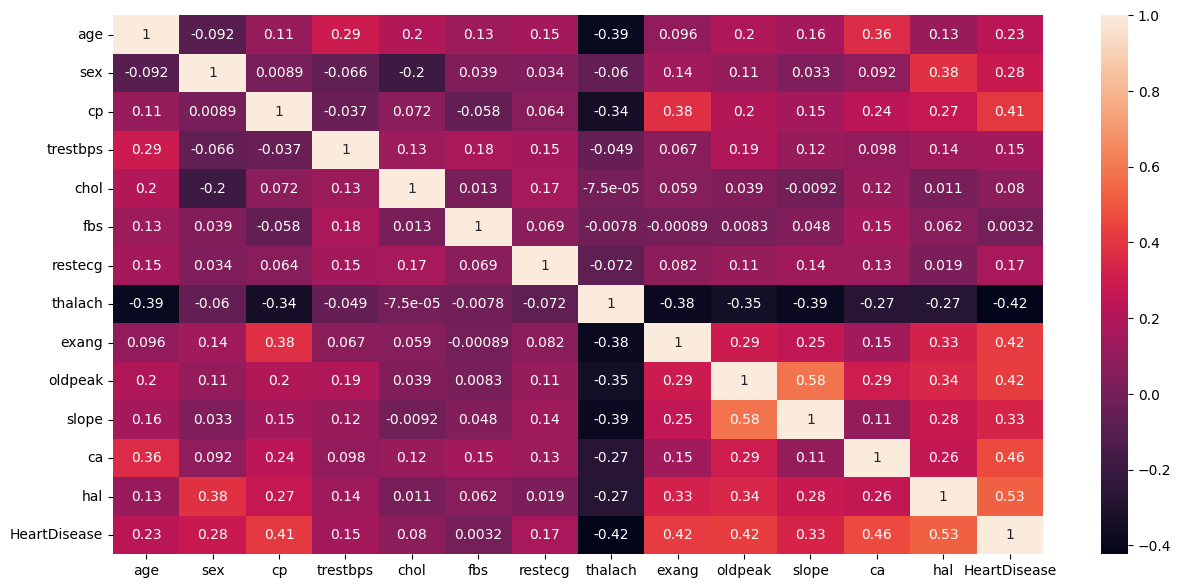

In [15]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot= True)

In [16]:
X=df.iloc[:,:-1]

In [17]:
y=df['HeartDisease']

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)


In [20]:
X_scaled

array([[ 0.93618065,  0.69109474, -2.24062879, ...,  2.26414539,
        -0.72197605,  0.65587737],
       [ 1.3789285 ,  0.69109474,  0.87388018, ...,  0.6437811 ,
         2.47842525, -0.89422007],
       [ 1.3789285 ,  0.69109474,  0.87388018, ...,  0.6437811 ,
         1.41162482,  1.17257652],
       ...,
       [ 1.48961547,  0.69109474,  0.87388018, ...,  0.6437811 ,
         1.41162482,  1.17257652],
       [ 0.27205887,  0.69109474,  0.87388018, ...,  0.6437811 ,
         0.34482438,  1.17257652],
       [ 0.27205887, -1.44697961, -1.20245913, ...,  0.6437811 ,
         0.34482438, -0.89422007]])

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [25]:
X_train.shape


(237, 13)

In [26]:
X_test.shape

(60, 13)

LOGISTIC REGRESSION MODEL

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [28]:
# Assuming you have determined the best parameters (replace with your actual values)
best_params = {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

# Initialize Logistic Regression with best parameters
logistic_model = LogisticRegression(**best_params)

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_report_result)

Accuracy: 0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.93      0.85        30
           1       0.92      0.73      0.81        30

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.85      0.83      0.83        60



In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'lbfgs']  # Algorithm to use in the optimization problem
}

# Initialize Logistic Regression
lr= LogisticRegression()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Initialize Logistic Regression with the best parameters
best_logistic_model = LogisticRegression(**best_params)

# Fit the model on the training data
best_logistic_model.fit(X_train, y_train)

# Predictions on the test set
y_pred1 = best_logistic_model.predict(X_test)

# Evaluate the performance
accuracy_logistic = accuracy_score(y_test, y_pred1)
classification_report_result = classification_report(y_test, y_pred1)

# Print the results
print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy: {accuracy_logistic}')
print('Classification Report:\n', classification_report_result)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.93      0.85        30
           1       0.92      0.73      0.81        30

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.85      0.83      0.83        60



c:\Users\HP\.conda\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\.conda\envs\project\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\.conda\envs\project\lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\HP\.conda\envs\project\lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _check_solver(self.sol

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

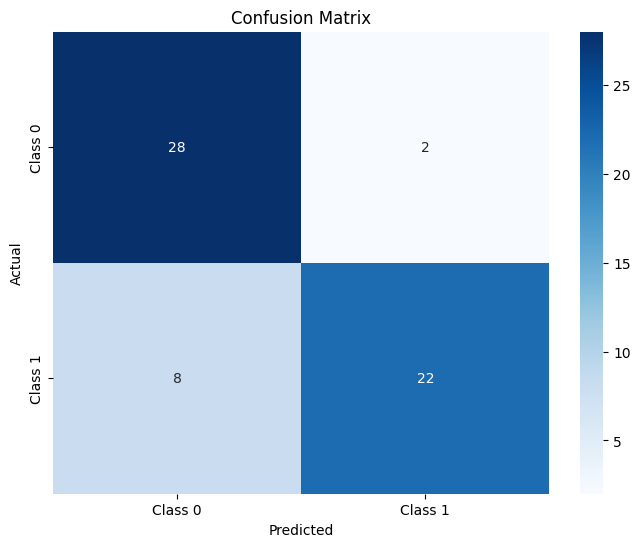

In [32]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

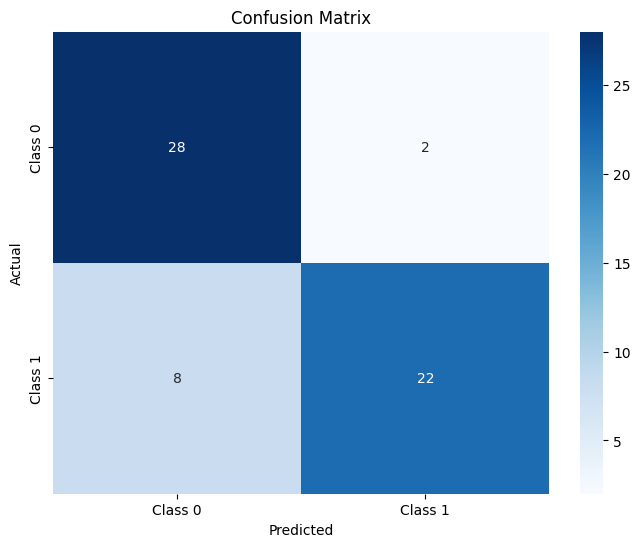

In [31]:
# Create a confusion matrix
conf_matrix1 = confusion_matrix(y_test, y_pred1)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

SVM MODEL

In [33]:
from sklearn.svm import SVC

In [34]:
# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],          # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']    # Kernel coefficient
}

# Initialize Support Vector Machine
svm_model = SVC()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params_svm = grid_search.best_params_

# Initialize SVM with the best parameters
best_svm_model = SVC(**best_params_svm)

# Fit the model on the training data
best_svm_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_svm = best_svm_model.predict(X_test)

# Evaluate the performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

# Print the results
print(f'Best Hyperparameters for SVM: {best_params_svm}')
print(f'Accuracy for SVM: {accuracy_svm}')
print('Classification Report for SVM:\n', classification_report_svm)

Best Hyperparameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy for SVM: 0.8333333333333334
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.78      0.93      0.85        30
           1       0.92      0.73      0.81        30

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.85      0.83      0.83        60



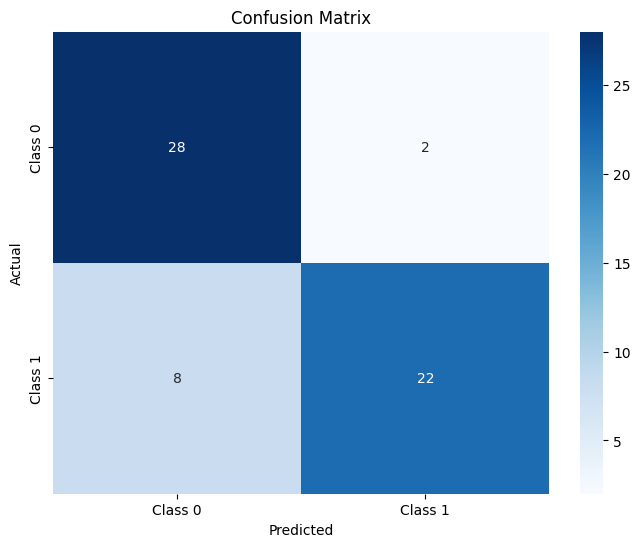

In [35]:
# Create a confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

RANDOM FOREST MODEL

In [36]:
from sklearn.ensemble import RandomForestClassifier

Best Hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy for Random Forest: 0.8
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82        30
           1       0.88      0.70      0.78        30

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60



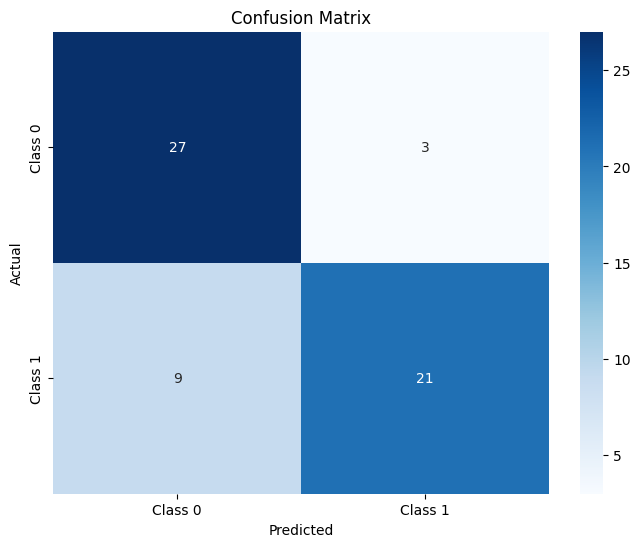

In [37]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],      # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],     # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]        # Minimum number of samples required to be at a leaf node
}

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params_rf = grid_search.best_params_

# Initialize Random Forest Classifier with the best parameters
best_rf_model = RandomForestClassifier(**best_params_rf)

# Fit the model on the training data
best_rf_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

# Print the results
print(f'Best Hyperparameters for Random Forest: {best_params_rf}')
print(f'Accuracy for Random Forest: {accuracy_rf}')
print('Classification Report for Random Forest:\n', classification_report_rf)

# Create a confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

XGBOOST MODEL

In [37]:
from xgboost import XGBClassifier


In [38]:
# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],          # Step size shrinkage to prevent overfitting
    'n_estimators': [50, 100, 200],               # Number of boosting rounds
    'max_depth': [3, 5, 7],                      # Maximum depth of a tree
    'subsample': [0.8, 1.0],                     # Fraction of samples used for fitting trees
    'colsample_bytree': [0.8, 1.0]               # Fraction of features used for fitting trees
}

# Initialize XGBoost Classifier
xgb_model = XGBClassifier()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params_xgb = grid_search.best_params_

# Initialize XGBoost Classifier with the best parameters
best_xgb_model = XGBClassifier(**best_params_xgb)

# Fit the model on the training data
best_xgb_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_report_xgb = classification_report(y_test, y_pred_xgb)

# Print the results
print(f'Best Hyperparameters for XGBoost: {best_params_xgb}')
print(f'Accuracy for XGBoost: {accuracy_xgb}')
print('Classification Report for XGBoost:\n', classification_report_xgb)

Best Hyperparameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}
Accuracy for XGBoost: 0.7833333333333333
Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.72      0.93      0.81        30
           1       0.90      0.63      0.75        30

    accuracy                           0.78        60
   macro avg       0.81      0.78      0.78        60
weighted avg       0.81      0.78      0.78        60



KNN MODEL

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7],          # Number of neighbors to consider
    'weights': ['uniform', 'distance'], # Weight function used in prediction
    'p': [1, 2]                          # Power parameter for the Minkowski metric
}

# Initialize KNN Classifier
knn_model = KNeighborsClassifier()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params_knn = grid_search.best_params_

# Initialize KNN Classifier with the best parameters
best_knn_model = KNeighborsClassifier(**best_params_knn)

# Fit the model on the training data
best_knn_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_knn = best_knn_model.predict(X_test)

# Evaluate the performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)

# Display the confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Print the results
print(f'Best Hyperparameters for KNN: {best_params_knn}')
print(f'Accuracy for KNN: {accuracy_knn}')
print('Classification Report for KNN:\n', classification_report_knn)
print('Confusion Matrix for KNN:\n', conf_matrix_knn)

Best Hyperparameters for KNN: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Accuracy for KNN: 0.8
Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82        30
           1       0.88      0.70      0.78        30

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60

Confusion Matrix for KNN:
 [[27  3]
 [ 9 21]]


C:\Users\HP\AppData\Local\Temp\ipykernel_7732\2174286073.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies, y=models, palette='viridis')


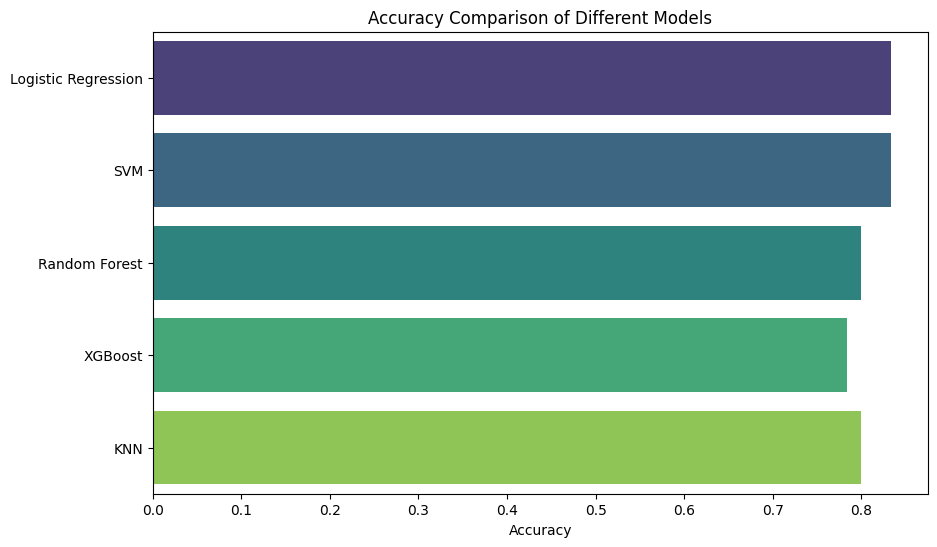

In [41]:

# Accuracy values for each model
accuracies = [accuracy_logistic, accuracy_svm, accuracy_rf, accuracy_xgb, accuracy_knn]
models = ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost', 'KNN']

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracies, y=models, palette='viridis')
plt.xlabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_7732\714811485.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


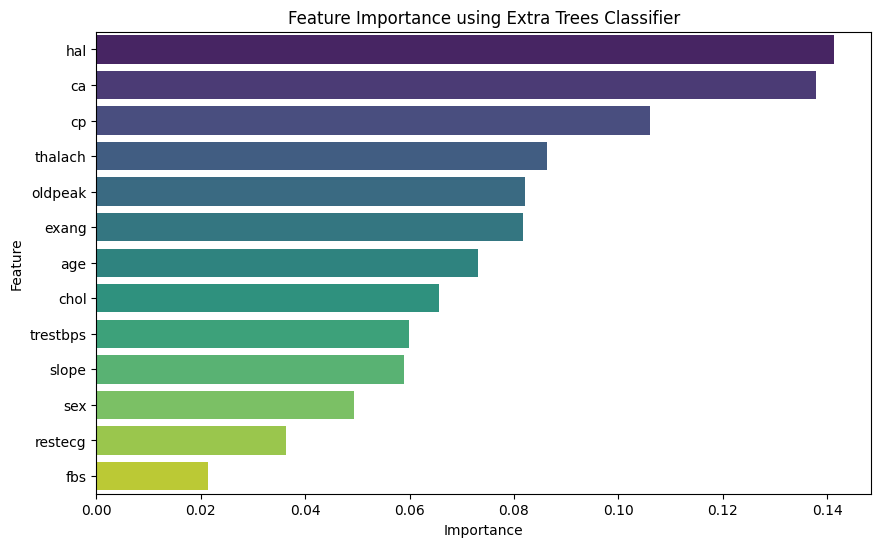

In [42]:
from sklearn.ensemble import ExtraTreesClassifier




# Initialize Extra Trees Classifier
et_classifier = ExtraTreesClassifier()

# Fit the model on the entire dataset
et_classifier.fit(X, y)

# Get feature importances
feature_importances = et_classifier.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel('Importance')
plt.title('Feature Importance using Extra Trees Classifier')
plt.show()


In [43]:
# Select the top 10 features
feature_importance_df.head(10)



,Feature,Importance
12,hal,0.141379
11,ca,0.137783
2,cp,0.106079
7,thalach,0.086314
9,oldpeak,0.082068
8,exang,0.081788
0,age,0.073067
4,chol,0.065655
3,trestbps,0.059883
10,slope,0.058931


In [61]:
# Convert NumPy array to Pandas DataFrame
X_scaled = pd.DataFrame(X_scaled)

In [68]:

new_Xscaled= X_scaled.drop(columns= [1,5,6])

In [65]:
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.936181,0.691095,-2.240629,0.750380,-0.276443,2.430427,1.010199,0.017494,-0.696419,1.068965,2.264145,-0.721976,0.655877
1,1.378929,0.691095,0.873880,1.596266,0.744555,-0.411450,1.010199,-1.816334,1.435916,0.381773,0.643781,2.478425,-0.894220
2,1.378929,0.691095,0.873880,-0.659431,-0.353500,-0.411450,1.010199,-0.899420,1.435916,1.326662,0.643781,1.411625,1.172577
3,-1.941680,0.691095,-0.164289,-0.095506,0.051047,-0.411450,-1.003419,1.633010,-0.696419,2.099753,2.264145,-0.721976,-0.894220
4,-1.498933,-1.446980,-1.202459,-0.095506,-0.835103,-0.411450,1.010199,0.978071,-0.696419,0.295874,-0.976583,-0.721976,-0.894220


In [64]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [69]:
new_Xscaled

,0,2,3,4,7,8,9,10,11,12
0,0.936181,-2.240629,0.750380,-0.276443,0.017494,-0.696419,1.068965,2.264145,-0.721976,0.655877
1,1.378929,0.873880,1.596266,0.744555,-1.816334,1.435916,0.381773,0.643781,2.478425,-0.894220
2,1.378929,0.873880,-0.659431,-0.353500,-0.899420,1.435916,1.326662,0.643781,1.411625,1.172577
3,-1.941680,-0.164289,-0.095506,0.051047,1.633010,-0.696419,2.099753,2.264145,-0.721976,-0.894220
4,-1.498933,-1.202459,-0.095506,-0.835103,0.978071,-0.696419,0.295874,-0.976583,-0.721976,-0.894220
...,...,...,...,...,...,...,...,...,...,...
292,0.272059,0.873880,0.468418,-0.122330,-1.161395,1.435916,-0.734914,0.643781,-0.721976,1.172577
293,-1.056185,-2.240629,-1.223355,0.320744,-0.768432,-0.696419,0.124076,0.643781,-0.721976,1.172577
294,1.489615,0.873880,0.693988,-1.047008,-0.375469,-0.696419,2.013854,0.643781,1.411625,1.172577
295,0.272059,0.873880,-0.095506,-2.241384,-1.510696,1.435916,0.124076,0.643781,0.344824,1.172577


In [70]:
# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(new_Xscaled, y, test_size=0.2, random_state=0)

In [71]:
# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'lbfgs']  # Algorithm to use in the optimization problem
}

# Initialize Logistic Regression
lr= LogisticRegression()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Initialize Logistic Regression with the best parameters
best_logistic_model = LogisticRegression(**best_params)

# Fit the model on the training data
best_logistic_model.fit(X_train, y_train)

# Predictions on the test set
y_pred1 = best_logistic_model.predict(X_test)

# Evaluate the performance
accuracy_logistic = accuracy_score(y_test, y_pred1)
classification_report_result = classification_report(y_test, y_pred1)

# Print the results
print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy: {accuracy_logistic}')
print('Classification Report:\n', classification_report_result)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8166666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.93      0.84        30
           1       0.91      0.70      0.79        30

    accuracy                           0.82        60
   macro avg       0.83      0.82      0.81        60
weighted avg       0.83      0.82      0.81        60



c:\Users\HP\.conda\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\.conda\envs\project\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\.conda\envs\project\lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\HP\.conda\envs\project\lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _check_solver(self.sol

In [72]:
# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],          # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']    # Kernel coefficient
}

# Initialize Support Vector Machine
svm_model = SVC()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params_svm = grid_search.best_params_

# Initialize SVM with the best parameters
best_svm_model = SVC(**best_params_svm)

# Fit the model on the training data
best_svm_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_svm = best_svm_model.predict(X_test)

# Evaluate the performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

# Print the results
print(f'Best Hyperparameters for SVM: {best_params_svm}')
print(f'Accuracy for SVM: {accuracy_svm}')
print('Classification Report for SVM:\n', classification_report_svm)

Best Hyperparameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy for SVM: 0.8166666666666667
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.76      0.93      0.84        30
           1       0.91      0.70      0.79        30

    accuracy                           0.82        60
   macro avg       0.83      0.82      0.81        60
weighted avg       0.83      0.82      0.81        60



In [74]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],      # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],     # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]        # Minimum number of samples required to be at a leaf node
}

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params_rf = grid_search.best_params_

# Initialize Random Forest Classifier with the best parameters
best_rf_model = RandomForestClassifier(**best_params_rf)

# Fit the model on the training data
best_rf_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

# Print the results
print(f'Best Hyperparameters for Random Forest: {best_params_rf}')
print(f'Accuracy for Random Forest: {accuracy_rf}')
print('Classification Report for Random Forest:\n', classification_report_rf)

# Create a confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

Best Hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy for Random Forest: 0.8
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81        30
           1       0.85      0.73      0.79        30

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60

